In [1]:
from netCDF4 import Dataset

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fileName = '../../ETOPO1_Ice_c_gmt4.grd'

fh = Dataset(fileName, mode='r')

fh.variables.keys()

x = fh.variables['x']
y = fh.variables['y']
z = fh.variables['z']

In [3]:
x,y,z

(<class 'netCDF4._netCDF4.Variable'>
 float64 x(x)
     long_name: Longitude
     actual_range: [-180.  180.]
     units: degrees_east
 unlimited dimensions: 
 current shape = (21600,)
 filling off, <class 'netCDF4._netCDF4.Variable'>
 float64 y(y)
     long_name: Latitude
     actual_range: [-90.  90.]
     units: degrees_north
 unlimited dimensions: 
 current shape = (10800,)
 filling off, <class 'netCDF4._netCDF4.Variable'>
 int32 z(y, x)
     long_name: z
     _FillValue: -2147483648
     actual_range: [-10803.   8333.]
 unlimited dimensions: 
 current shape = (10800, 21600)
 filling off)

In [4]:
dx = np.diff(x[:])[0]
dy = np.diff(y[:])[0]
print('dx={}, dy={}'.format(dx,dy))

dx=0.01666666666667993, dy=0.01666666666666572


I want the rectangle $ (lon,lat) \in [-240,-120] \times [-60, 60] $, but can only use  $lon \in[-180,180]$, hence have to use the joined set: $$lon \in [120,180] \cup [-180,-120]$$

# Pick a subrectangle around Chile

In [11]:
y0 = -36
y1 = -16
j0 = int((y0+90)*60)
j1 = int((y1+90)*60)

(0.0, 360.0, 0.0, 1200.0)

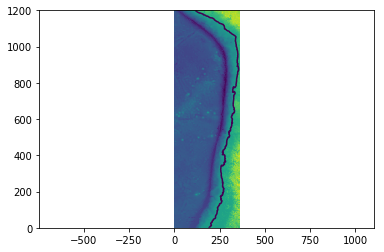

In [12]:
x0 = -76
x1 = -70
i0 = int((x0+180)*60)
i1 = int((x1+180)*60)

plt.pcolormesh(z[j0:j1:1,i0:i1:1])
plt.contour(z[j0:j1:1,i0:i1:1],[0.0])
plt.axis('equal')

Select bathymetry from range and skip some values

In [13]:
skip = 1
zfinal = z[j0:j1,i0:i1]
print('Mesh size:', zfinal.shape)

Mesh size: (1200, 360)


In [19]:
arr = np.hstack([zfinal.shape[0],zfinal.shape[1],(-zfinal).ravel()])

In [25]:
arr.astype('float64').tofile('bathymetry')

In [26]:
arr.shape

(432002,)

# metadata

In [21]:
zfinal.min(),zfinal.max()

(-8086, 6306)

In [22]:
xfinal.min(), xfinal.max()

(-76.0, -70.0)

In [23]:
yfinal.min(), yfinal.max()

(-36.0, -16.0)

In [24]:
zfinal.shape

(1200, 360)